In [8]:
import numpy as np

from project.wfc.factory import Factory
from project.wfc.grid import Grid, Rect
from project.config import DATA_SOURCE, GRIDS_FOLDER
from project.wfc.wfc import WFC
from project.utils.perfomance_logger import PerformanceLogger
from project.wfc.judge import RandomJudge
from project.machine_learning.model_mc import ModelMC

In [7]:
logger = PerformanceLogger()
factory = Factory(DATA_SOURCE)
patterns = factory.create_patterns()

INFO - Validation Result: success



In [6]:
sizes = np.arange(2, 10)
target_successes = 20

INFO - Validation Result: success



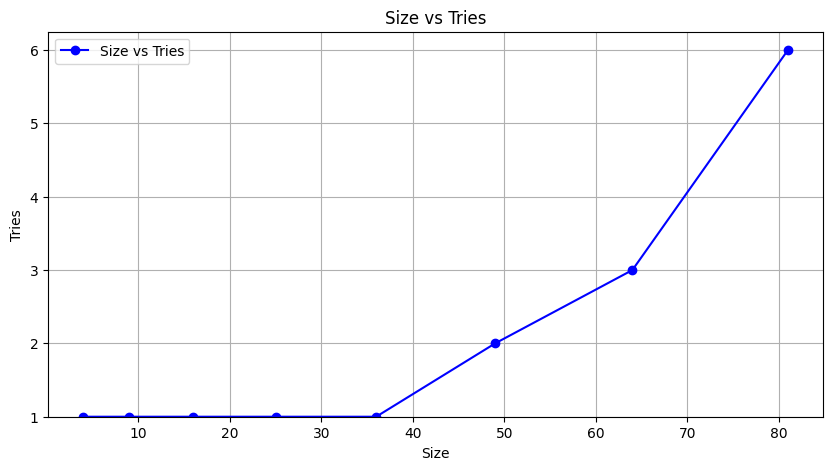

In [5]:
sizes = np.arange(2, 10)
target_successes = 20

judge = RandomJudge()

for size in sizes:
    rect = Rect(width=size, height=size)
    grid = Grid(rect=rect, patterns=patterns)
    wfc = WFC(grid=grid, judge=judge)

    succesess = 0
    tries = []
    while succesess < target_successes:
        is_succeeded = False
        local_tries = 0

        while is_succeeded != True:
            local_tries += 1
            is_succeeded = wfc.generate()
        
        succesess += 1
        tries.append(local_tries)
    
    median_tries = np.median(np.array(tries))
    logger.log(size=size**2, tries=median_tries)

logger.draw_log()

In [10]:
judge = ModelMC(view=Rect(3, 3))
judge.train(grids_path=GRIDS_FOLDER)

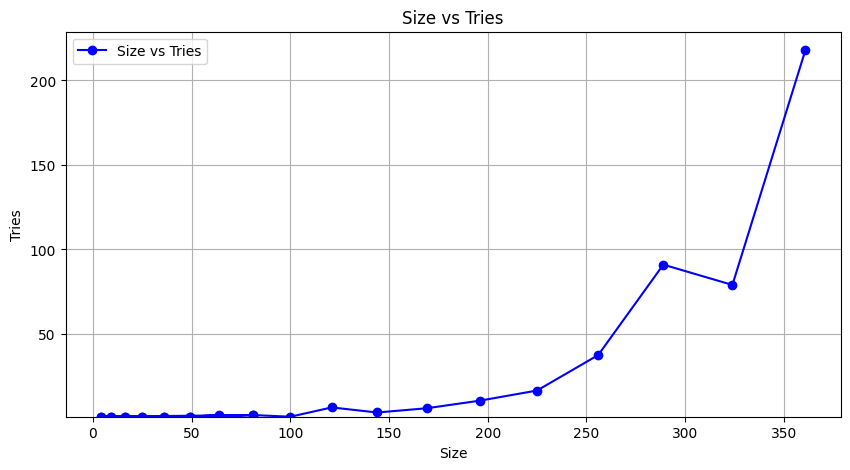

In [15]:
sizes = np.arange(2, 20)
target_successes = 20

for size in sizes:
    rect = Rect(width=size, height=size)
    grid = Grid(rect=rect, patterns=patterns)
    wfc = WFC(grid=grid, judge=judge)

    succesess = 0
    tries = []
    while succesess < target_successes:
        is_succeeded = False
        local_tries = 0

        while is_succeeded != True:
            local_tries += 1
            is_succeeded = wfc.generate()
        
        succesess += 1
        tries.append(local_tries)
    
    median_tries = np.median(np.array(tries))
    logger.log(size=size**2, tries=median_tries)

logger.draw_log()